In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-05-28 06:20:18.064634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748413218.333695      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748413218.411900      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
import zipfile

with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/train.zip", 'r') as zip_ref:
    zip_ref.extractall("/kaggle/working/train")

with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/test1.zip", 'r') as zip_ref:
    zip_ref.extractall("/kaggle/working/test1")

In [3]:
print(os.listdir("/kaggle/working/test1"))
print(os.listdir("/kaggle/working/train"))

['test1']
['train']


In [4]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
# filenames = os.listdir("/kaggle/working/train/train")
# categories = []
# for filename in filenames:
#     category = filename.split('.')[0]
#     if category == 'dog':
#         categories.append(1)
#     else:
#         categories.append(0)

# df = pd.DataFrame({
#     'filename': filenames,
#     'category': categories
# })

In [6]:
import os
import pandas as pd

filenames = os.listdir("/kaggle/working/train/train")
categories = []

for filename in filenames:
    label = filename.split('.')[0]
    if label == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# 🔥 문자열로 바꿔주기 (중요)
df["category"] = df["category"].astype(str)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory="/kaggle/working/train/train",
    x_col="filename",
    y_col="category",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory="/kaggle/working/train/train",
    x_col="filename",
    y_col="category",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [8]:
df.head()

filename category
0  dog.8696.jpg        1
1  dog.2091.jpg        1
2  dog.7327.jpg        1
3  dog.6729.jpg        1
4  dog.8378.jpg        1

In [9]:
df.tail()

filename category
24995   dog.5484.jpg        1
24996    cat.902.jpg        0
24997   cat.2263.jpg        0
24998  cat.10393.jpg        0
24999   dog.4239.jpg        1

In [93]:
df.shape

(25000, 2)

category
1    12500
0    12500
Name: count, dtype: int64


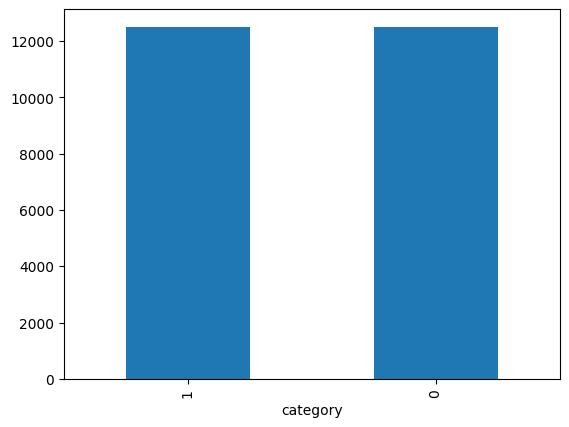

In [91]:
df['category'].value_counts().plot.bar()
print(df['category'].value_counts())

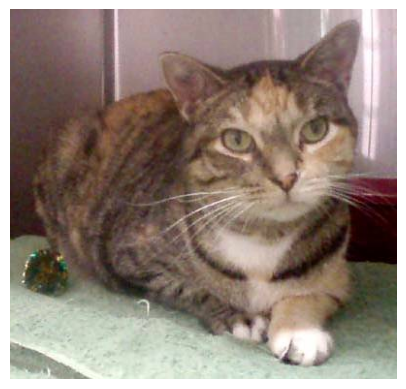

In [11]:
# 예: 파일 이름 리스트 중 무작위 선택
sample = random.choice(filenames)

# 경로 생성 (슬래시가 누락되지 않도록 os.path.join 사용 권장)
image_path = os.path.join("/kaggle/working/train/train", sample)

# 이미지 로드
image = load_img(image_path)

# 이미지 시각화
plt.imshow(image)
plt.axis('off')  # 축 숨기기 (선택)
plt.show()

From our data we have 12000 cats and 12000 dogs

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748413245.824832      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

# Callbacks

In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [14]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [17]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [18]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

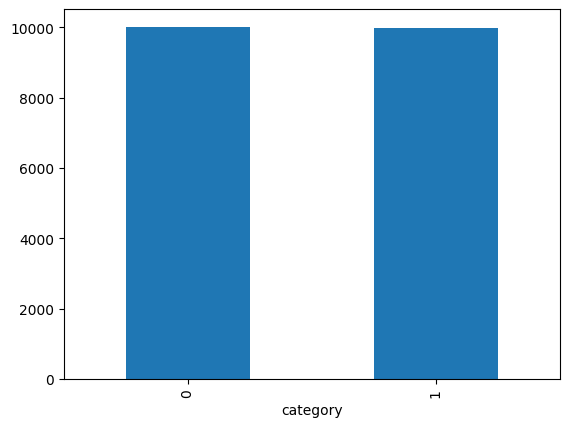

In [19]:
train_df['category'].value_counts().plot.bar()

category
1    2518
0    2482
Name: count, dtype: int64


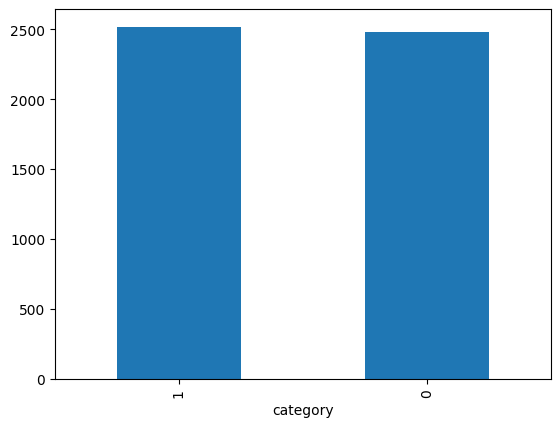

In [95]:
validate_df['category'].value_counts().plot.bar()
print(validate_df['category'].value_counts())

In [21]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Traning Generator

In [22]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/kaggle/working/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### Validation Generator

In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/kaggle/working/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


# See how our generator work

In [24]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/kaggle/working/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


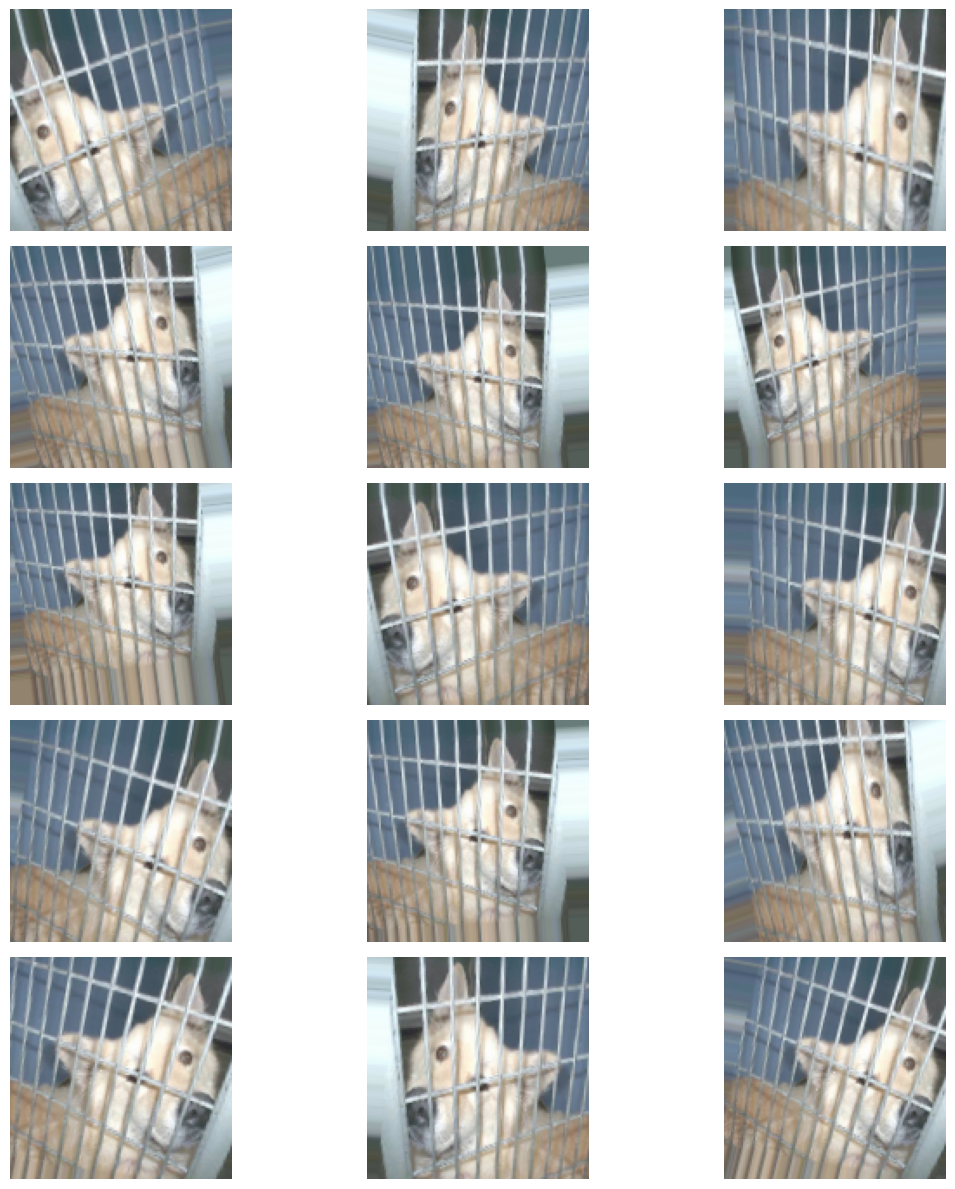

In [25]:
import matplotlib.pyplot as plt

# figure 생성
plt.figure(figsize=(12, 12))

# generator에서 15장의 이미지만 수집
count = 0
for X_batch, Y_batch in example_generator:
    for i in range(X_batch.shape[0]):
        if count >= 15:
            break
        plt.subplot(5, 3, count + 1)
        plt.imshow(X_batch[i])
        plt.axis('off')  # 축 제거
        count += 1
    if count >= 15:
        break

plt.tight_layout()
plt.show()


Seem to be nice 

# Fit Model

In [26]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1748413252.156527      97 service.cc:148] XLA service 0x790bcc00dd30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748413252.157503      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748413252.571110      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


   4/1333 ━━━━━━━━━━━━━━━━━━━━ 1:08 52ms/step - accuracy: 0.4597 - loss: 2.4989

I0000 00:00:1748413257.541306      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 109s 75ms/step - accuracy: 0.6045 - loss: 0.9219 - val_accuracy: 0.6715 - val_loss: 0.6549 - learning_rate: 0.0010
Epoch 2/50
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6667 - loss: 0.8333

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6667 - loss: 0.8333 - val_accuracy: 0.7259 - val_loss: 0.5816 - learning_rate: 0.0010
Epoch 3/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 97s 72ms/step - accuracy: 0.7072 - loss: 0.5762 - val_accuracy: 0.7159 - val_loss: 0.6105 - learning_rate: 0.0010
Epoch 4/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7333 - loss: 0.4831 - val_accuracy: 0.7594 - val_loss: 0.5013 - learning_rate: 0.0010
Epoch 5/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 95s 71ms/step - accuracy: 0.7541 - loss: 0.5101 - val_accuracy: 0.7762 - val_loss: 0.4717 - learning_rate: 0.0010
Epoch 6/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8667 - loss: 0.3610 - val_accuracy: 0.7744 - val_loss: 0.4726 - learning_rate: 0.0010
Epoch 7/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 94s 71ms/step - accuracy: 0.7729 - loss: 0.4782 - val_accuracy: 0.7616 - val_loss: 0.5704 - learning_rate: 0.0010
Epoch 8/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6667 - loss: 

# Save Model

In [28]:
model.save_weights("model.weights.h5")

# Virtualize Training

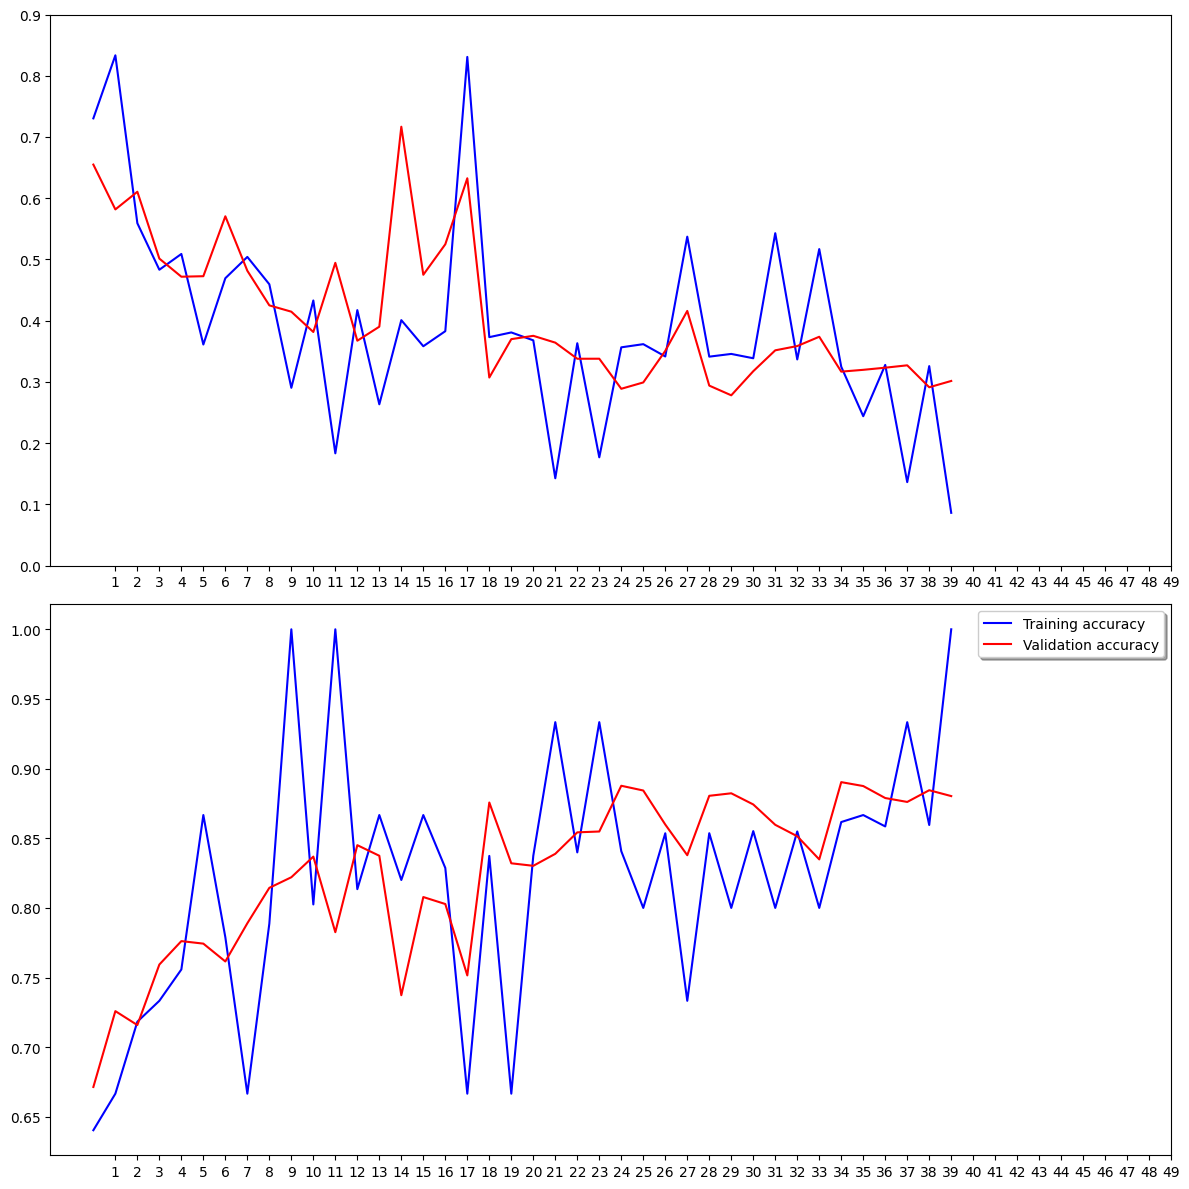

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [32]:
test_filenames = os.listdir("/kaggle/working/test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [96]:
print(test_df['category'].value_counts())

category
0    7018
1    5482
Name: count, dtype: int64


# Create Testing Generator

In [34]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/kaggle/working/test1/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


# Predict

In [37]:
steps = int(np.ceil(nb_samples / batch_size))
predict = model.predict(test_generator, steps=steps)


834/834 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [38]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [39]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [65]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### Virtaulize Result

<Axes: xlabel='category'>

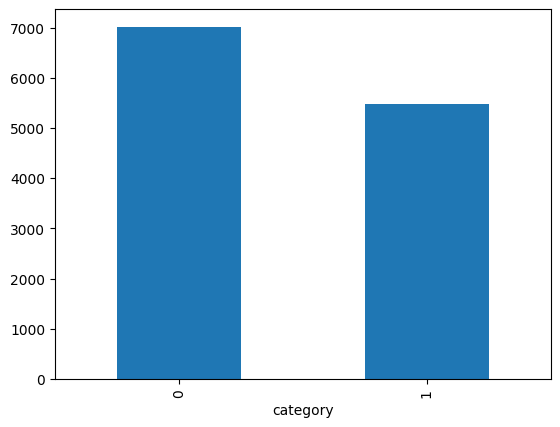

In [66]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

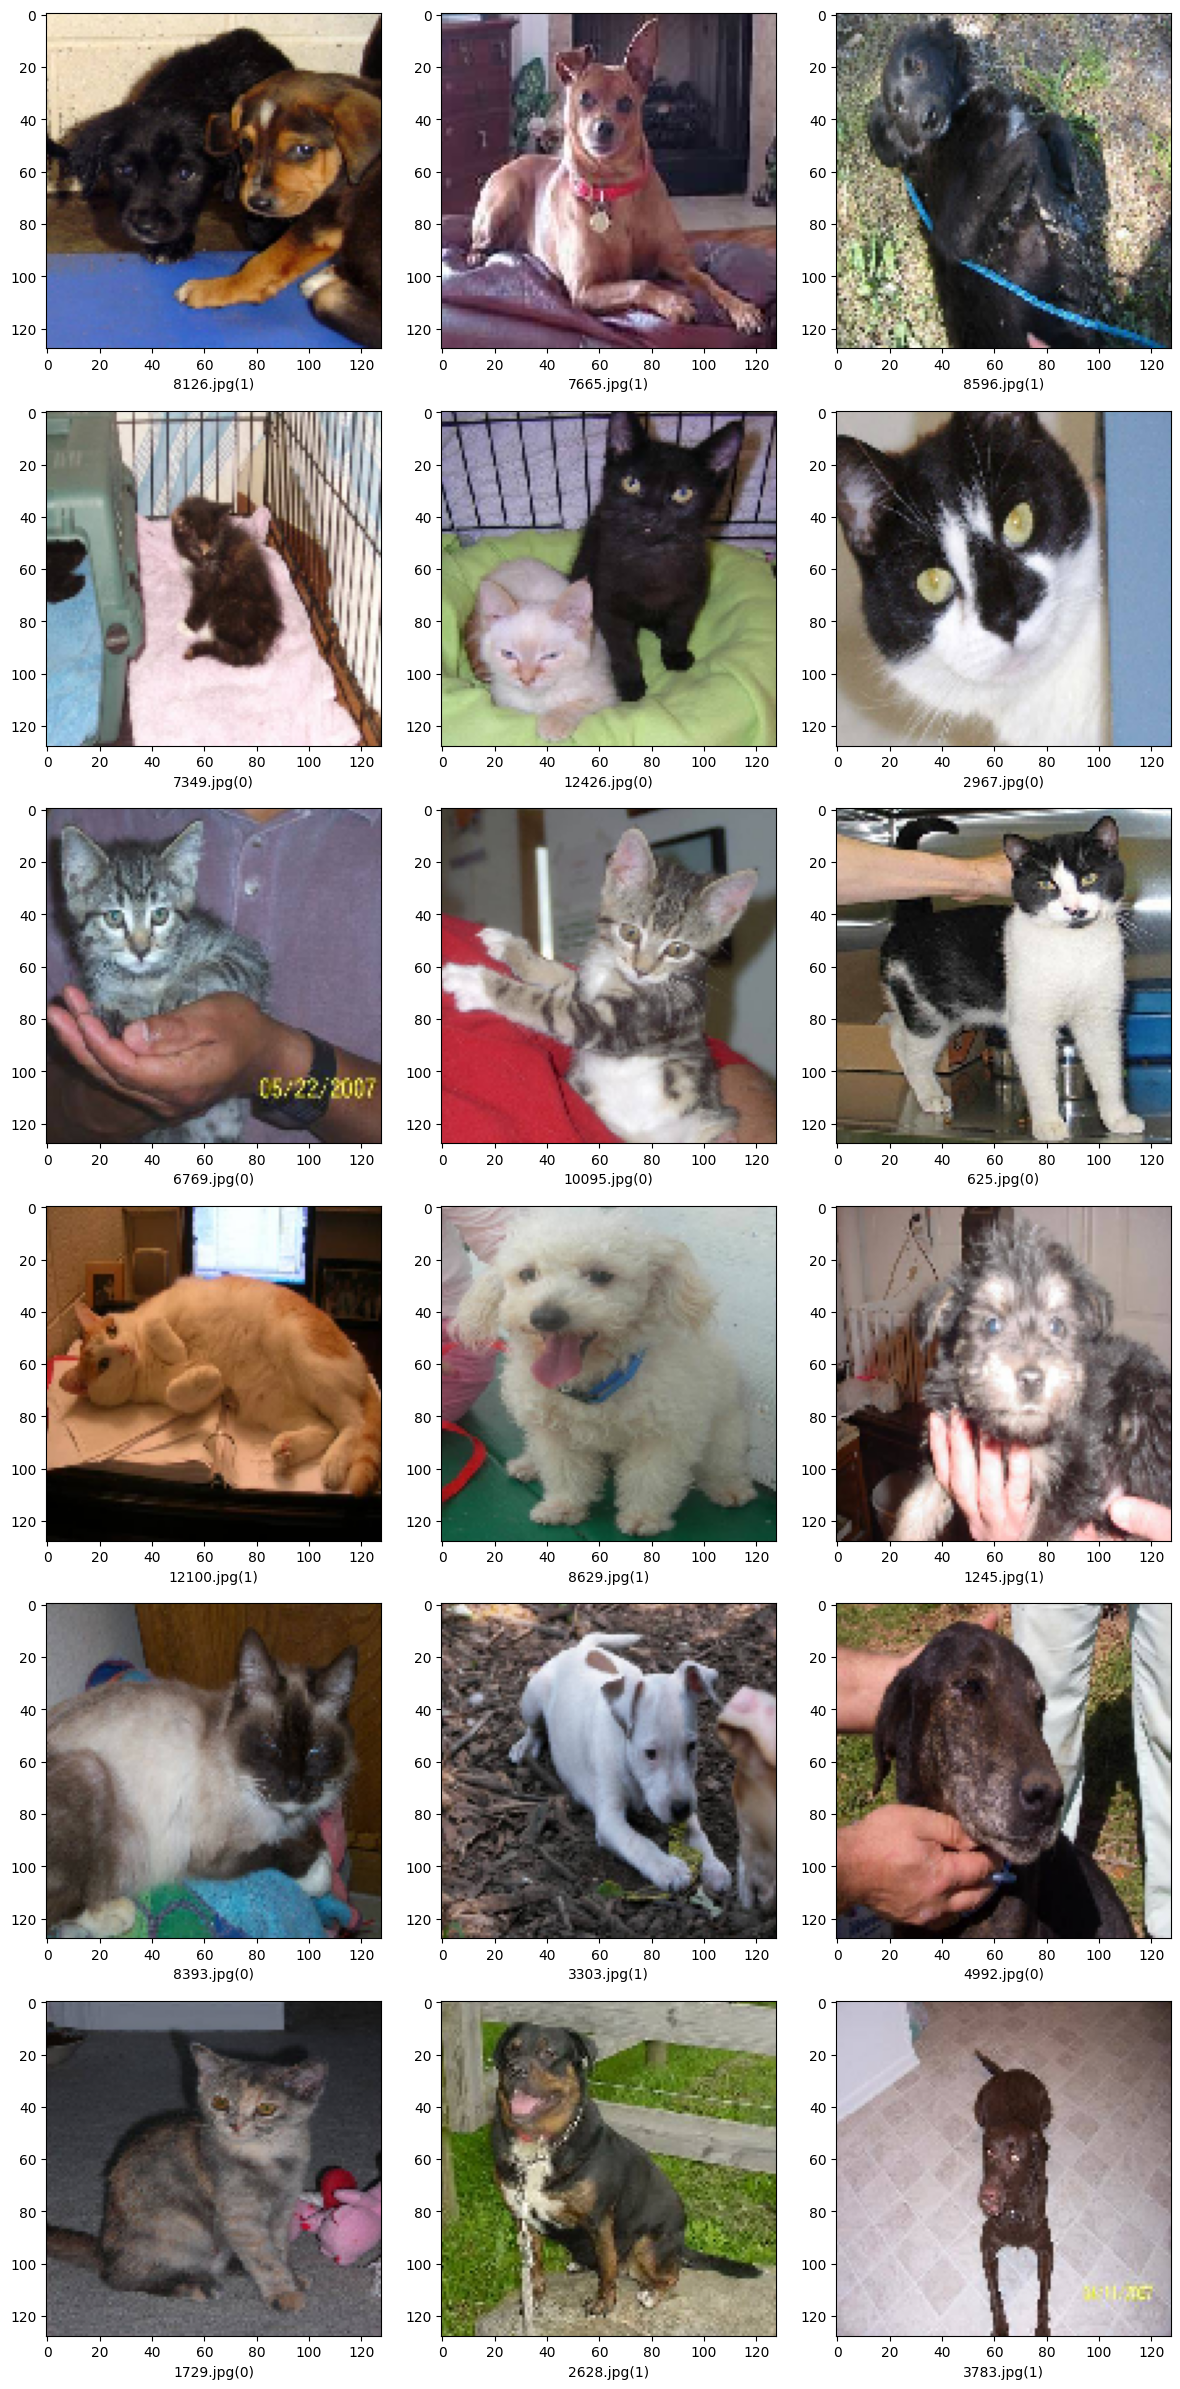

In [44]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/kaggle/working/test1/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [48]:
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples / batch_size)))


834/834 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step


In [84]:
# 1. 예측된 숫자 클래스 저장
test_df['category'] = np.argmax(predict, axis=-1)

# 2. 숫자 → 문자열로 변환해 별도 컬럼 생성
test_df['label_str'] = test_df['category'].map({0: 'cat', 1: 'dog'})
 # ✅ 여기까지만


In [85]:
print(test_df[['filename', 'category', 'label_str']].head())


    filename  category label_str
0   8126.jpg         1       dog
1   7665.jpg         1       dog
2   8596.jpg         1       dog
3   7349.jpg         0       cat
4  12426.jpg         0       cat


In [87]:
test_df['category'] = np.argmax(predict, axis=-1)

# 강제 변환을 위해 int 타입으로 명시
test_df['category'] = test_df['category'].astype(int)

# 명시적 매핑
test_df['label_str'] = test_df['category'].map({0: 'cat', 1: 'dog'})
print(test_df[['filename', 'category', 'label_str']].head())


    filename  category label_str
0   8126.jpg         1       dog
1   7665.jpg         1       dog
2   8596.jpg         1       dog
3   7349.jpg         0       cat
4  12426.jpg         0       cat


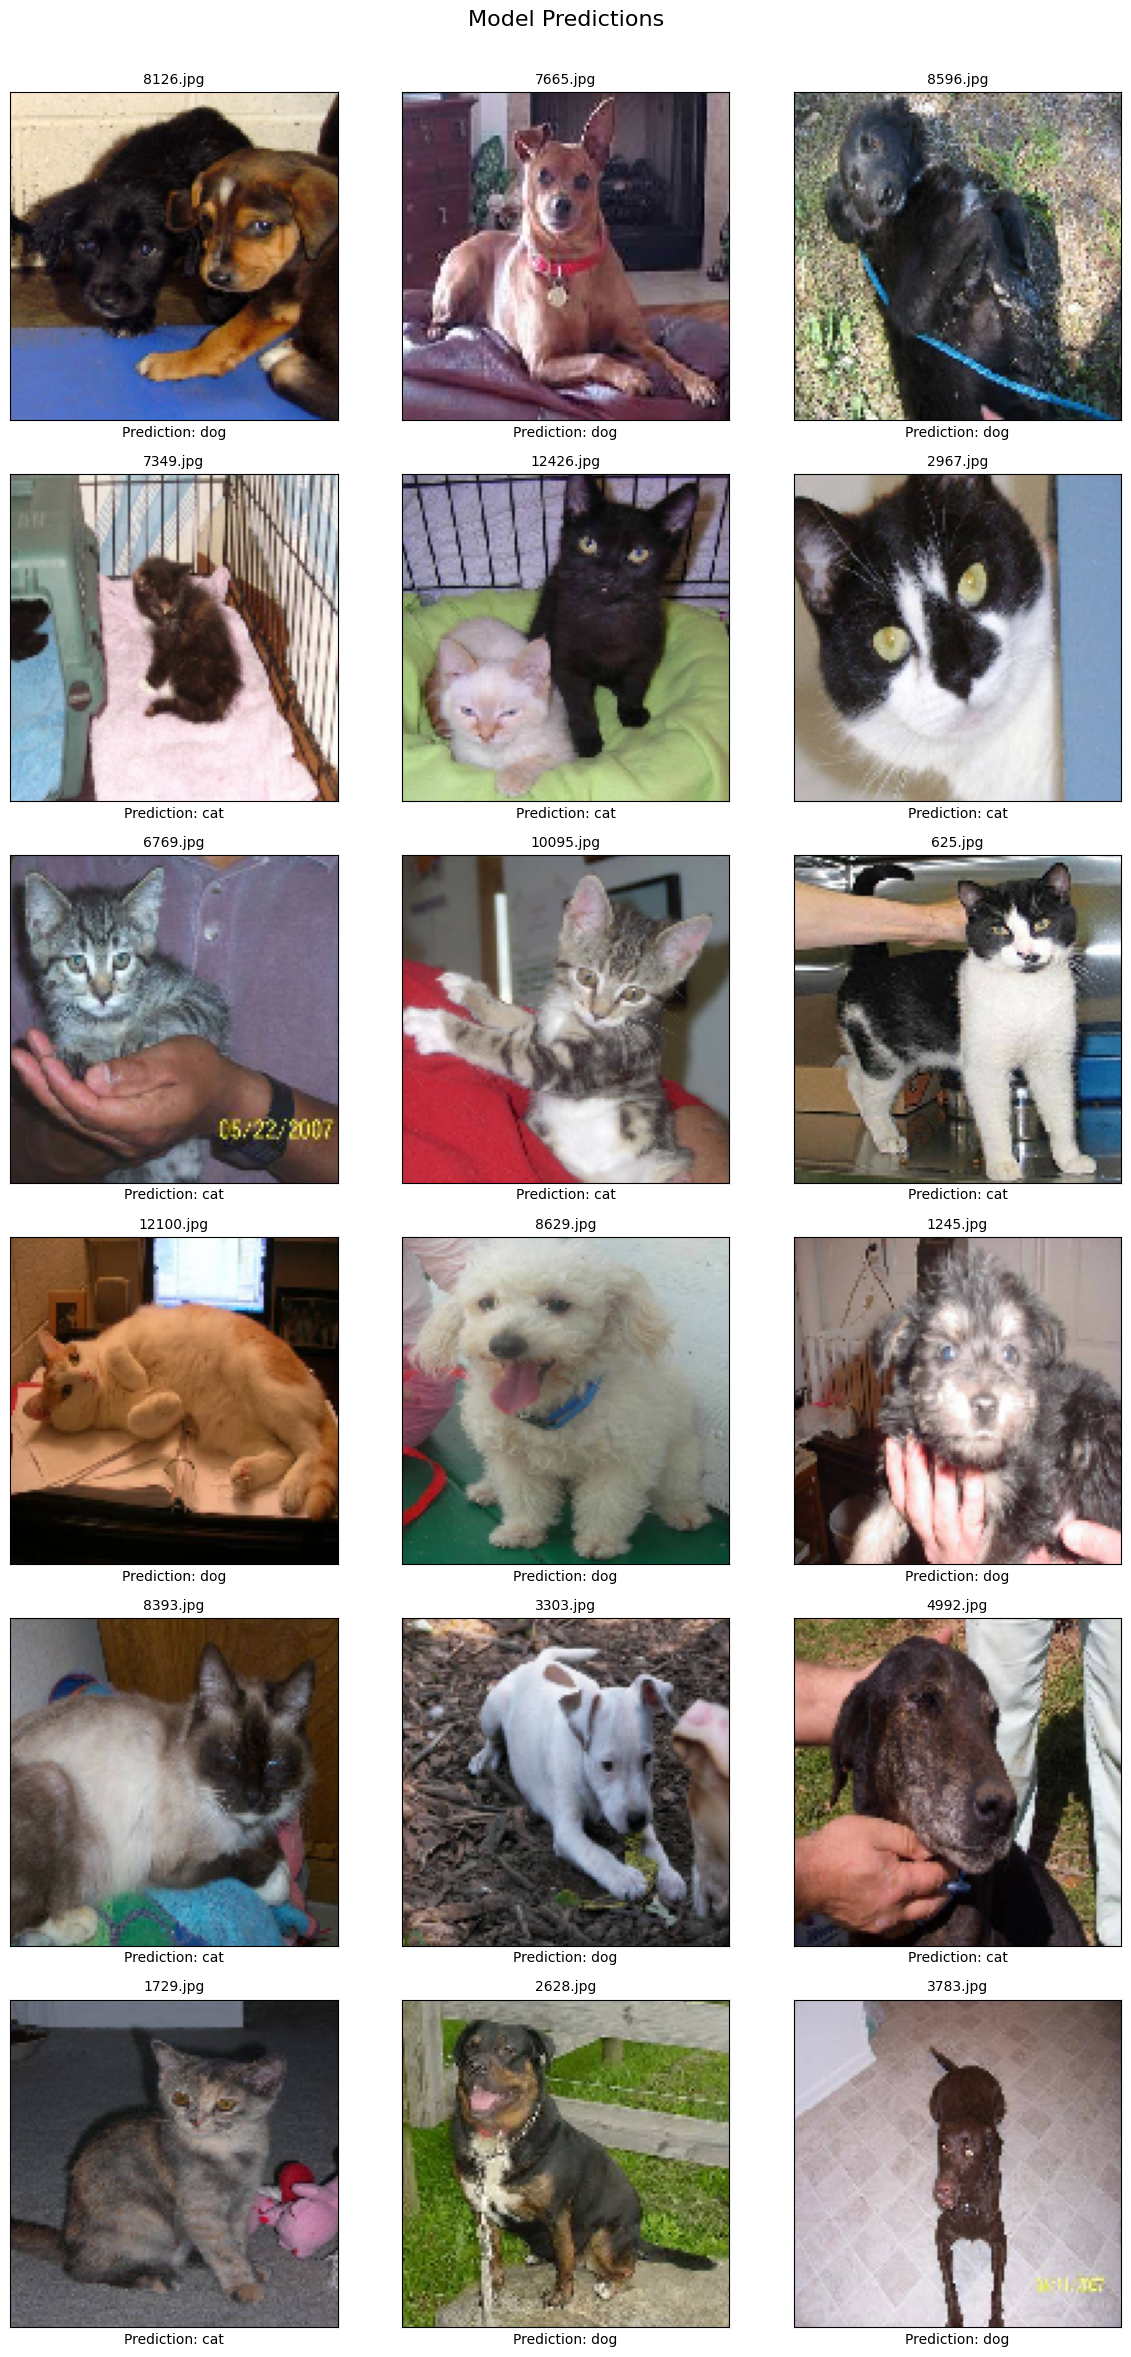

In [88]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# 1. 예측 결과 처리
# 숫자 예측 결과
test_df['category'] = np.argmax(predict, axis=-1)

# 강제 변환을 위해 int 타입으로 명시
test_df['category'] = test_df['category'].astype(int)

# 명시적 매핑
test_df['label_str'] = test_df['category'].map({0: 'cat', 1: 'dog'})

# 2. 샘플 18장만 시각화
sample_test = test_df.head(18)

# 3. 이미지 시각화
plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    label_str = row['label_str']  # ✅ 이 줄을 주석 해제해야 함

    img_path = f"/kaggle/working/test1/test1/{filename}"
    img = load_img(img_path, target_size=IMAGE_SIZE)

    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.title(f"{filename}", fontsize=10)
    plt.xlabel(f"Prediction: {label_str}", fontsize=10)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("Model Predictions", fontsize=16)
plt.show()


# Submission

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

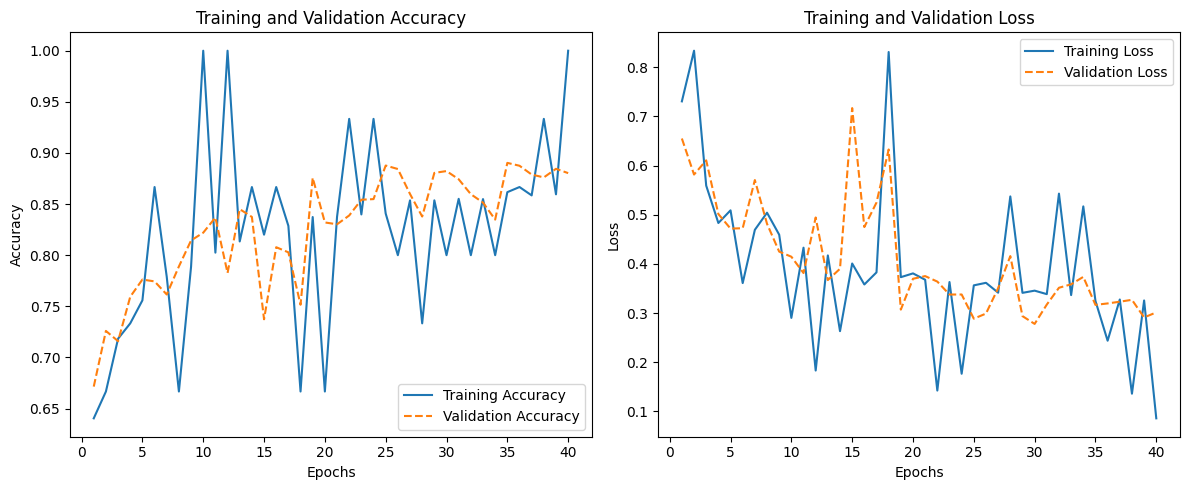

In [90]:
import matplotlib.pyplot as plt

# 훈련 기록
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# 1. 정확도 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')       # '-' → 선만
plt.plot(epochs, val_acc, '--', label='Validation Accuracy') # '--' → 점선
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 2. 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val_loss, '--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
